<a href="https://colab.research.google.com/github/Mangalis0/regression_team_2/blob/master/Faatimah_'fresh'_notebook_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?id=1Tkiy1Gvc4Ce0L3qiHKUAvkttcWkGMU8O)

                                                                      Image source: https://vc4a.com/ventures/sendy-limited/





# **Sendy Explore Competition - Regression Analysis**

____

Team 2 - Mangaliso Samuel Makhoba, Bryan Green, Michael Ilic, Lawrence Hlapa, Faatimah Mansoor 

**The structure of this notebook is as follows:**

[**1 Introduction**](#Introduction)




[**2 Body**](#Body)

  [2.1 Import modules](#Import_modules)

  [2.2 Import dataset]

  [2.3 EDA]

  [2.4 Modelling]

  [2.5 Model selection]

  [2.6 Using model on Test]

  [2.7 Functions to be placed in API]

[**3 Conclusion**](#Conclusion)

[**4 References and links**](#References_and_links)


##**1 Introduction**
<a id="Introduction"></a>

Sendy is a logistic company in Kenya. The aim of this project is to build a regression model for Sendy which can accurately predict delivery time, from the time a package is picked up to its arrival at the final destination.

To build this model, the Train dataset and the riders dataset will used. Regression models will be trained, and the most suitable will be selected. This model will then be used to predict delivery time for the test dataset 

**Variable to be predicted(y):** Time_from_Pickup_to_Arrival

**Independent variables(X)**:




##**2 Body**
<a id="Body"></a>

###2.1 Import modules
<a id="Import_modules"></a>

In [3]:
#import modules 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import math

###2.2 Import dataset

In [ ]:
#if using google colab,run this cell to import data 
train = pd.read_csv('/content/Train.csv') #training set
test = pd.read_csv('/content/Test.csv') #testing set(y variable to be predicted)
riders = pd.read_csv('/content/Riders.csv') #riders info
variable_def = pd.read_csv('/content/VariableDefinitions.csv')
sample = pd.read_csv('/content/SampleSubmission.csv') #sample of competition submission, should have order no for testing set, and y predicted from model

In [5]:
#if using jupyter notebook, run this cell to import data
train = pd.read_csv('Train.csv') #training set
test = pd.read_csv('Test.csv') #testing set(y variable to be predicted)
riders = pd.read_csv('Riders.csv') #riders info
variable_def = pd.read_csv('VariableDefinitions.csv')
sample = pd.read_csv('SampleSubmission.csv') #sample of competition submission, should have order no for testing set, and y predicted from model

###2.3 EDA

**Variable** **definitions**

In [7]:
variable_def

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


In [ ]:
# Mike: Add a bar chart to show number of values and missing values

# code goes here

**Riders EDA**

In [8]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [9]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


In [10]:
riders.isnull().sum(axis = 0) #number of nulls per column 

Rider Id          0
No_Of_Orders      0
Age               0
Average_Rating    0
No_of_Ratings     0
dtype: int64

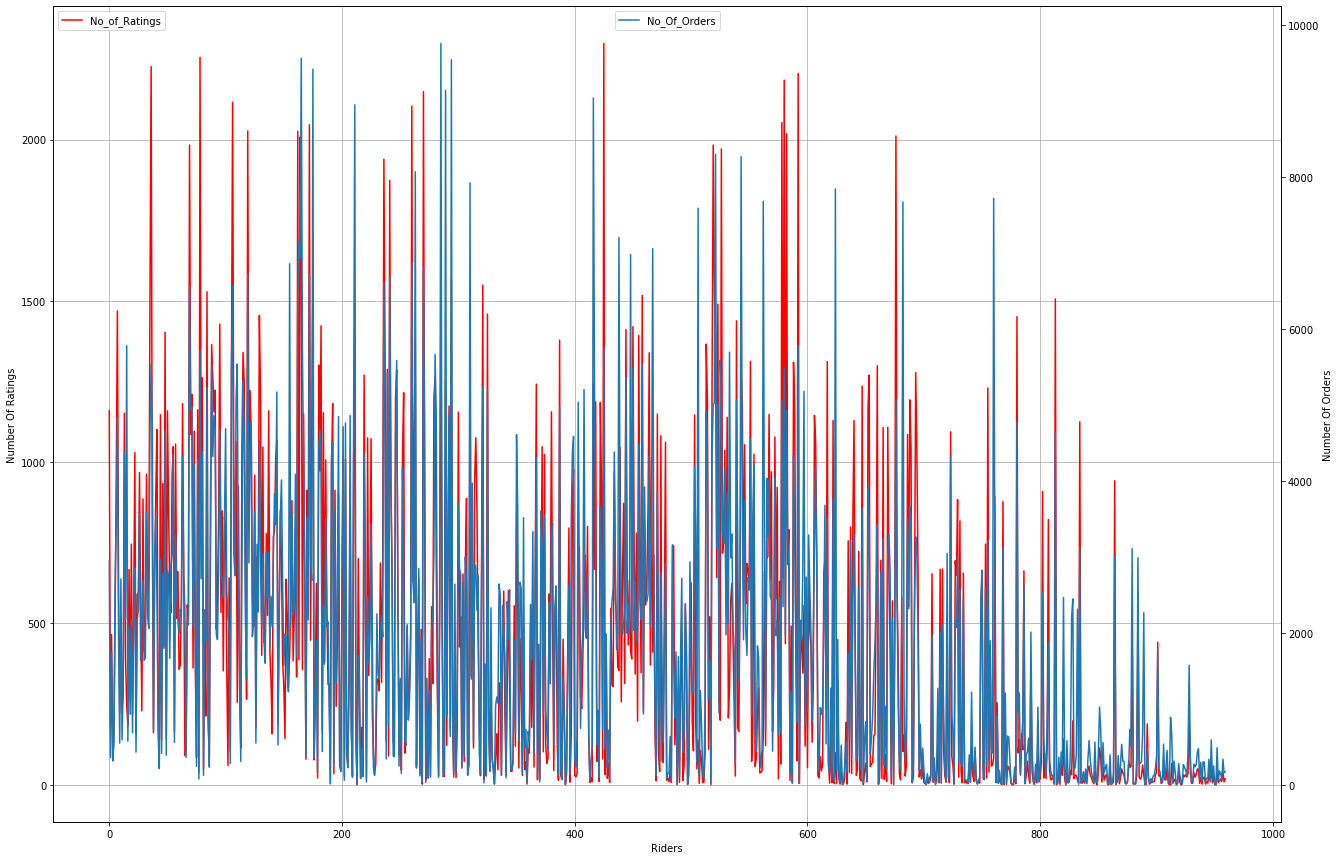

In [11]:

# Riders Number Of Ratings Vs Number Of Orders

from matplotlib import rc

rc('mathtext', default='regular')
# Create Empty figure
build = plt.figure(figsize=(22,15))

# Split Figure To Allow Two Sets Of Y Axes
axes1 = build.add_subplot(111)

# Plot The First Line On Its Axis
axes1.plot(np.arange(len(riders["No_of_Ratings"])), riders["No_of_Ratings"], '-', label = "No_of_Ratings", color='red')

# Create Second Y Axis And Plot Second Line
axes2 = axes1.twinx()
axes2.plot(np.arange(len(riders["No_Of_Orders"])), riders["No_Of_Orders"], '-', label = "No_Of_Orders")

# Add Legends For Each Axis
axes1.legend(loc=2)
axes2.legend(loc=9)

axes1.grid()

# Set Labels Of Axes
axes1.set_xlabel("Riders")
axes1.set_ylabel("Number Of Ratings")
axes2.set_ylabel("Number Of Orders")
plt.show()

**Train EDA**

In [12]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [13]:
print('train contains')
print('No. of rows:', train.shape[0])
print('No. of columns:', train.shape[1])

train contains
No. of rows: 21201
No. of columns: 29


In [14]:
train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [52]:
train.isnull().sum(axis = 0) #number of nulls per column

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

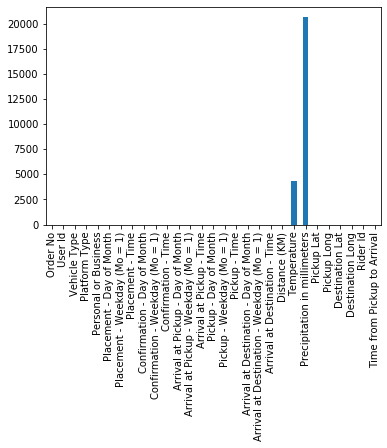

In [53]:
# Bar chart showing the number of missing values in each column
train.isnull().sum().plot(kind='bar')

In [19]:
def percentage_missing_values(input_df, column_name):
  
  missing_col_values = sum(input_df[column_name].isnull())

  per_col_missing = round(missing_col_values / len(input_df[column_name]) * 100, 2)

  return print(column_name, ":" ,per_col_missing, "percentage of the data is missing")

In [20]:
percentage_missing_values(train, "Temperature")

Temperature : 20.59 percentage of the data is missing


In [28]:
percentage_missing_values(train, "Precipitation in millimeters")

Precipitation in millimeters : 97.4 percentage of the data is missing


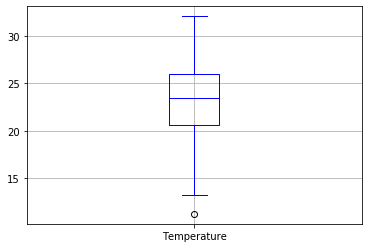

In [31]:
#understanding temperature data
train.boxplot(['Temperature'], color = 'blue')
plt.show()

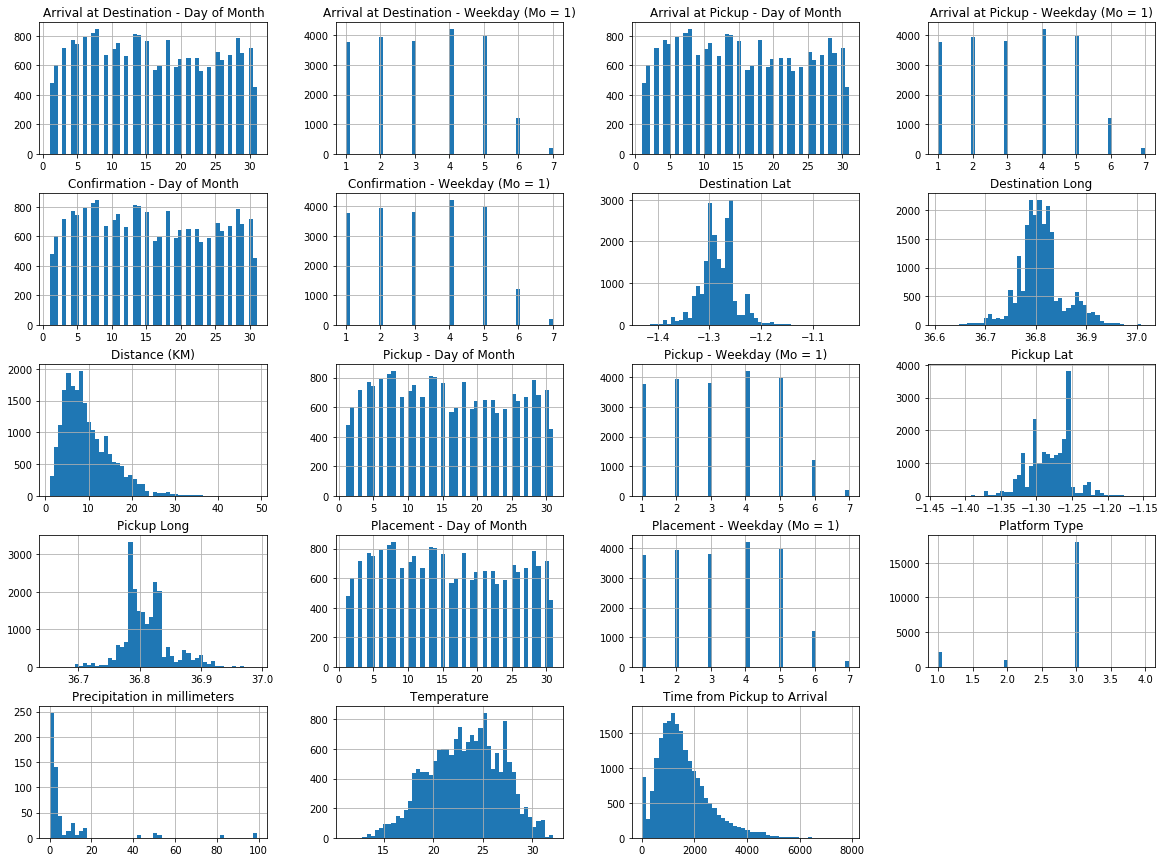

In [25]:
#plotting distributions of all the variables in train
train.hist(bins=50, figsize=(20,15), color = 'tab:blue')
plt.show()

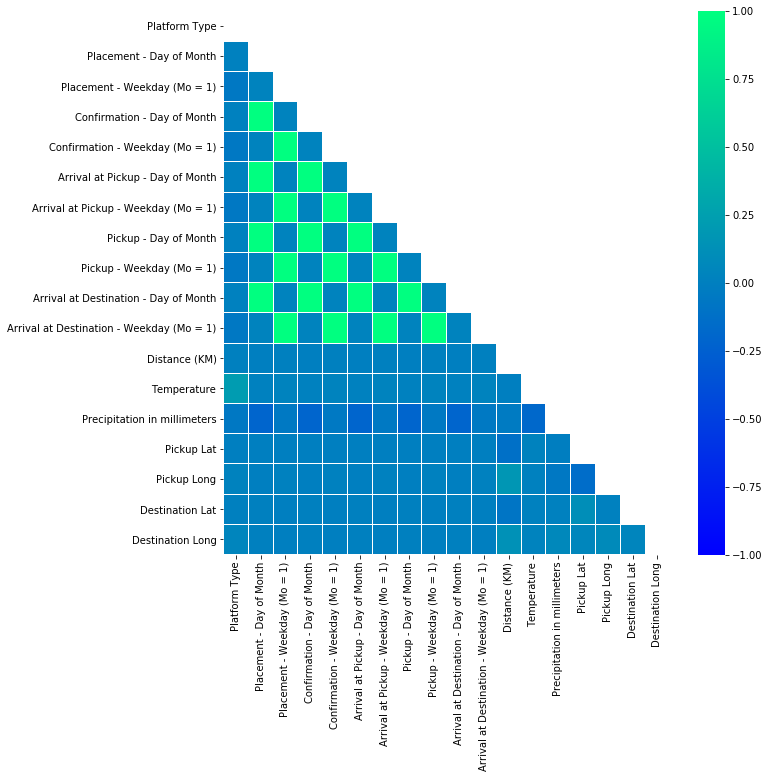

In [46]:
# Plotting correlation heat map for predictor variable in train 
train_variables = train.drop(['Time from Pickup to Arrival'], axis =1)
train_kor = train_variables.corr()

# Mask top half of matrix as it contains redunant info
mask = np.zeros_like(train_kor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the matrix
plt.figure(figsize=(10,10))
sns.heatmap(train_kor, vmin=-1, vmax=1, cmap='winter', linewidth=0.1, mask = mask);

In [7]:
#visualising pick-up locations on a street map 
px.scatter_mapbox(train, 
                     lat='Pickup Lat', 
                     lon='Pickup Long',  
                     color = 'Time from Pickup to Arrival',
                     color_continuous_scale = 'Oranges', 
                     mapbox_style = 'open-street-map',
                     title = 'pick up location')

**Test data**

In [56]:
test.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [57]:
print('test contains')
print('No. of rows:', test.shape[0])
print('No. of columns:', test.shape[1])

test contains
No. of rows: 7068
No. of columns: 25


In [59]:
if train.column not in test.column:
  print(train.column)

AttributeError: 'DataFrame' object has no attribute 'column'

###2.3 Data preprocessing

###2.4 Modelling 

In [60]:
# split into train and test
# X = df[""] # Feature columns
# y = df[""] # Outcome column
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

NameError: name 'X' is not defined

###2.5. Model Selection

Final decision:
create a df with all the models and the r2 values 
select the one with the best r2 and use it to predict from the testing df
Also check Assess model accuracy in variable selection train 

###2.6 Using the model on test

all transformations to be done on testing df 

Predict y based on model, output a df for competition that has order no, and time from pick-up to arrival 

In [ ]:
# Mike: Visualize the model's final predict with the data around it

# code goes here, waiting for the previous code to be implemented

###2.7 Function to be placed in API  

##**3 Conclusion**
<a id="Conclusion"></a> 

##**4 References and links**
<a id="References_and_links"></a>

Trello board https://trello.com/invite/b/sTrqpPh0/260261e33880d23cf37aa649c1541763/regression-team-2-project-board

Github 

API

Google drive presentation slides https://drive.google.com/drive/folders/17_A2yVWEc7ixWI2BFRkJ5b1x98E31H0r?usp=sharing